In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import csv
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
nltk.download('stopwords')
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#conda install -c conda-forge textblob
from textblob import TextBlob

In [5]:
#pip install wordcloud
#from wordcloud import WordCloud,STOPWORDS

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
data_ = pd.read_csv("C:/Users/Hp/Downloads/ce7934ac5eaf11ea/dataset/train_file.csv")

In [3]:
data_.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


In [10]:
min(data_['SentimentHeadline'])
data_.shape

(55932, 11)

In [13]:
data_.groupby(['Topic']).mean()

,IDLink,Title,Headline,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
Topic,,,,,,,,,
economy,zzyeHd9SOI,"‘US economy mostly growing, some areas flat’",• Net 14.5 per cent of businesses are confiden...,2016-03-29 01:41:08,49211,1267,3716,0.962354,0.900000
microsoft,zzsOQBgpWt,‘We do design cloud solutions for hospitals as...,•Microsoft and Code.org offering educators a M...,2016-03-29 01:38:00,22346,1001,3652,0.714610,0.964646
obama,zztejNRGdY,‘Star Wars': Obama sees a bit of ‘rebel’ Han S...,“You’re all suckers.” That has to be what Bara...,2016-03-29 01:35:09,40836,725,1858,0.795495,0.602500
palestine,zzC43pEuyj,“Dialogue” isn’t enough to address the Israel-...,"“Women of Palestine. Living through Trauma, Bu...",2016-03-29 00:15:21,8840,392,983,0.553399,0.469871


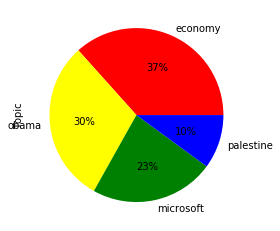

In [10]:
#Airline Tweets
data_.Topic.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green","blue"])

In [7]:
data_['Sentiment_Title_new'] = ['Positive' if x >= 0 else 'Negative' for x in data_['SentimentTitle']] 


In [8]:
train_pos = data_[ data_['Sentiment_Title_new'] == 'Positive']
train_pos = train_pos['Title']
train_neg = data_[ data_['Sentiment_Title_new'] == 'Negative']
train_neg = train_neg['Title']
train_neg


2         Nouriel Roubini: Global Economy Not Back to 2008
5        Intellitec Solutions to Host 13th Annual Sprin...
8        Fire claims more than 100-year-old barn in Han...
9              Microsoft's new Windows 10 ad targets Apple
15       Microsoft Word for Mac 2016 review: A subtle y...
16          Microsoft Band 2 gains appeal with lower price
18       Greek economy shrank 0.3 percent last year but...
21       Greek economy shrank 0.3 percent last year but...
27       Microsoft’s Other Mobile App Takeover: The Sto...
33       China's sharing economy generates USD298b in 2015
38       Microsoft Launches Pre-Orders For HoloLens Dev...
42       Microsoft to start shipping $3,000 HoloLens de...
43       We just got another massive sign of how badly ...
44       We just got another massive sign of how badly ...
50       Microsoft HoloLens Preorders Open Today for $3...
52       Microsoft Reignites Mac-PC Rivalry With New Wi...
53                             Belgium Q4 Growth Unrevis

Positive words


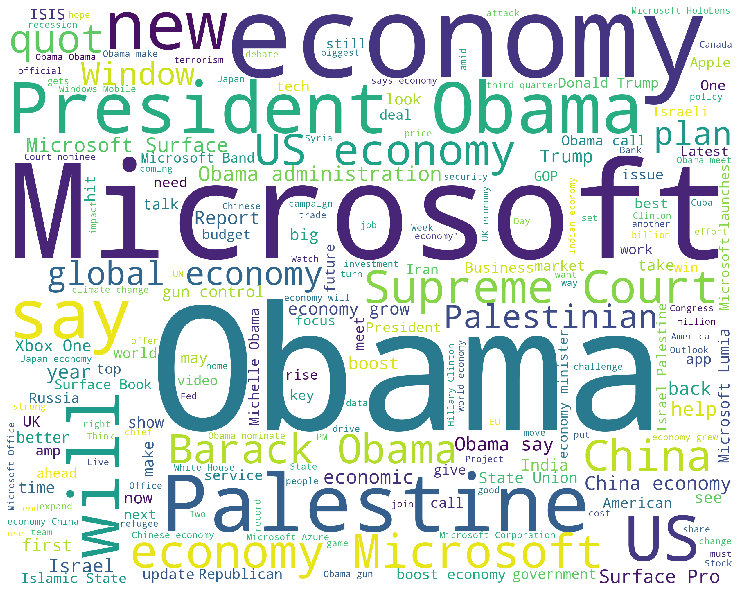

In [18]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')


Negative words


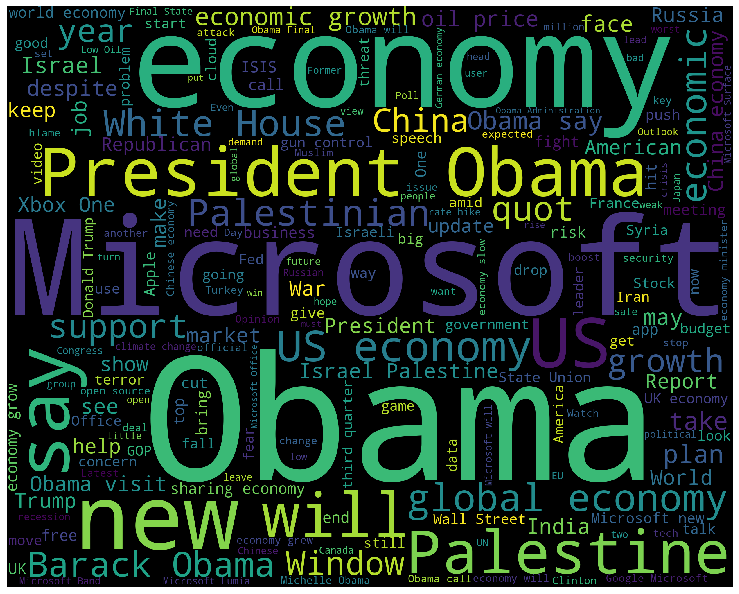

In [21]:
print("Negative words")
wordcloud_draw(train_neg)

In [21]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in data_.iterrows():
    words_filtered = [e.lower() for e in row.Title.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and not word.startswith('#')
        and not word.startswith('%')
        and not word.startswith('£')
        and not word.startswith('%')             
        and not word.startswith('\x9d')
        and not word.startswith('(')
        and not word.startswith('[')
        and not word.startswith('ú')
        and not word.startswith('~')
        and word !='\x9d'            
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    words_without_stopwords = " ".join(str(x) for x in words_without_stopwords)
    tweets.append((words_without_stopwords))

In [18]:
## Adding this cleaner data to the Train_data
data_['Title_cleaned']  = tweets
data_.head()


,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline,Sentiment_Title_new,Title_cleaned
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300,Positive,obama lays wreath arlington national cemetery
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386,Positive,look health chinese economy
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754,Negative,nouriel roubini: global economy back 2008
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064,Positive,finland gdp expands
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084,Positive,"tourism, govt spending buoys thai economy january"


In [13]:
## Start Tokenization
all_words = data_['Title_cleaned'].str.cat(sep=', ')

In [16]:
Dict = dict.fromkeys(all_words,0)
Dict

{'o': 0,
 'b': 0,
 'a': 0,
 'm': 0,
 ' ': 0,
 'l': 0,
 'y': 0,
 's': 0,
 'w': 0,
 'r': 0,
 'e': 0,
 't': 0,
 'h': 0,
 'i': 0,
 'n': 0,
 'g': 0,
 'c': 0,
 ',': 0,
 'k': 0,
 'u': 0,
 ':': 0,
 '2': 0,
 '0': 0,
 '8': 0,
 'f': 0,
 'd': 0,
 'p': 0,
 'x': 0,
 'v': 0,
 'j': 0,
 '1': 0,
 '3': 0,
 '6': 0,
 '-': 0,
 "'": 0,
 '“': 0,
 '”': 0,
 '.': 0,
 'q': 0,
 '/': 0,
 '£': 0,
 '?': 0,
 '$': 0,
 '7': 0,
 '5': 0,
 '’': 0,
 '9': 0,
 'z': 0,
 '‘': 0,
 '(': 0,
 ')': 0,
 '&': 0,
 ';': 0,
 '!': 0,
 '\x9d': 0,
 '4': 0,
 '%': 0,
 '+': 0,
 'ö': 0,
 '#': 0,
 '`': 0,
 '*': 0,
 '[': 0,
 '=': 0,
 ']': 0,
 'ñ': 0,
 'á': 0,
 '—': 0,
 'â': 0,
 '€': 0,
 '™': 0,
 '…': 0,
 'é': 0,
 '|': 0,
 '–': 0,
 '@': 0,
 '~': 0,
 '®': 0,
 '´': 0,
 'ú': 0}

In [22]:
## Now using NTLK to predict the polarity of the Title
sid = SentimentIntensityAnalyzer()
def sentiment_ntlk(text):
    try:
        compound_ = sid.polarity_scores(text)
        return compound_['compound']
    except:
        return None

data_['sentiment_ntlk'] = data_['Title_cleaned'].apply(sentiment_ntlk)

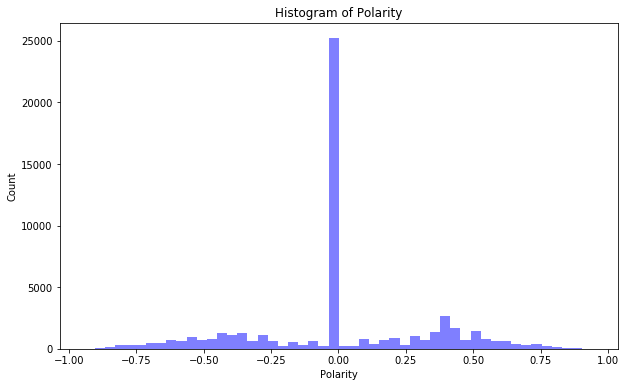

In [23]:
## Now let us see the distribution of the Polarity for both of the ways
num_bins = 50
plt.figure(figsize =(10,6))
n, bins, patches = plt.hist(data_.sentiment_ntlk, num_bins, facecolor = 'blue', alpha = 0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity')
plt.show()

In [24]:
## Test Data
## Reading the Data
data_test = pd.read_csv("C:/Users/Hp/Downloads/ce7934ac5eaf11ea/dataset/test_file.csv")

In [25]:
## Cleaning the Title like removing STOP WORDS, @, #, http etc
tweets_test = []
stopwords_set = set(stopwords.words("english"))

for index, row in data_test.iterrows():
    words_filtered = [e.lower() for e in row.Title.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and not word.startswith('#')
        and not word.startswith('%')
        and not word.startswith('£')
        and not word.startswith('%')             
        and not word.startswith('\x9d')
        and not word.startswith('(')
        and not word.startswith('[')
        and not word.startswith('ú')
        and not word.startswith('~')
        and word !='\x9d'            
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    words_without_stopwords = " ".join(str(x) for x in words_without_stopwords)
    tweets_test.append((words_without_stopwords))

In [26]:
## Calculating the Polarity for Title
data_test['Title_cleaned']  = tweets_test
data_test['sentiment_ntlk'] = data_test['Title_cleaned'].apply(sentiment_ntlk)

In [27]:
## Cleaning the Headline like removing STOP WORDS, @, #, http etc
tweets_test = []
stopwords_set = set(stopwords.words("english"))

for index, row in data_test.iterrows():
    words_filtered = [e.lower() for e in row.Headline.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and not word.startswith('#')
        and not word.startswith('%')
        and not word.startswith('£')
        and not word.startswith('%')             
        and not word.startswith('\x9d')
        and not word.startswith('(')
        and not word.startswith('[')
        and not word.startswith('ú')
        and not word.startswith('~')
        and word !='\x9d'            
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    words_without_stopwords = " ".join(str(x) for x in words_without_stopwords)
    tweets_test.append((words_without_stopwords))

In [28]:
## Calculating the Polarity for Headline
data_test['Headline_cleaned']  = tweets_test
data_test['sentiment_h_ntlk'] = data_test['Headline_cleaned'].apply(sentiment_ntlk)

In [29]:
#Saving the Files
write_test = data_test[['IDLink', 'sentiment_ntlk', 'sentiment_h_ntlk']]
write_test.to_csv('C:/Users/Hp/Downloads/ce7934ac5eaf11ea/dataset/Output.csv')